**Data Preparation & Exploration**


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

drive.mount('/content/gdrive')
df_data=pd.read_csv('gdrive/My Drive/data.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df_data.head(n=6)

,dateRep,year_week,cases_weekly,deaths_weekly,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,notification_rate_per_100000_population_14-days
0,11/01/2021,2021-01,675,71,Afghanistan,AF,AFG,38041757.0,Asia,4.15
1,04/01/2021,2020-53,902,60,Afghanistan,AF,AFG,38041757.0,Asia,7.61
2,28/12/2020,2020-52,1994,88,Afghanistan,AF,AFG,38041757.0,Asia,7.19
3,21/12/2020,2020-51,740,111,Afghanistan,AF,AFG,38041757.0,Asia,6.56
4,14/12/2020,2020-50,1757,71,Afghanistan,AF,AFG,38041757.0,Asia,9.01
5,07/12/2020,2020-49,1672,137,Afghanistan,AF,AFG,38041757.0,Asia,7.22


In [ ]:
df_data.describe()

,cases_weekly,deaths_weekly,popData2019,notification_rate_per_100000_population_14-days
count,9.791000e+03,9791.000000,9.769000e+03,9556.000000
mean,9.171902e+03,198.195179,4.043069e+07,77.844643
std,5.562173e+04,926.689829,1.515012e+08,189.287209
min,-3.864000e+03,-875.000000,8.150000e+02,-132.600000
25%,8.000000e+00,0.000000,1.293120e+06,0.810000
50%,1.670000e+02,2.000000,7.169456e+06,7.690000
75%,2.334500e+03,37.000000,2.851583e+07,61.965000
max,1.782792e+06,22852.000000,1.433784e+09,4343.440000


In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9791 entries, 0 to 9790
Data columns (total 10 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   dateRep                                          9791 non-null   object 
 1   year_week                                        9791 non-null   object 
 2   cases_weekly                                     9791 non-null   int64  
 3   deaths_weekly                                    9791 non-null   int64  
 4   countriesAndTerritories                          9791 non-null   object 
 5   geoId                                            9747 non-null   object 
 6   countryterritoryCode                             9769 non-null   object 
 7   popData2019                                      9769 non-null   float64
 8   continentExp                                     9791 non-null   object 
 9   notification_rate_per_100000_p

In [ ]:
df_data=df_data.dropna()
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9513 entries, 0 to 9789
Data columns (total 10 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   dateRep                                          9513 non-null   object 
 1   year_week                                        9513 non-null   object 
 2   cases_weekly                                     9513 non-null   int64  
 3   deaths_weekly                                    9513 non-null   int64  
 4   countriesAndTerritories                          9513 non-null   object 
 5   geoId                                            9513 non-null   object 
 6   countryterritoryCode                             9513 non-null   object 
 7   popData2019                                      9513 non-null   float64
 8   continentExp                                     9513 non-null   object 
 9   notification_rate_per_100000_p

**Data Visualization**


In [ ]:
fatality_rate=df_data['deaths_weekly']/df_data['popData2019']*1000000
df_data['fatality_rate']=fatality_rate
df_data.head(n=6)

,dateRep,year_week,cases_weekly,deaths_weekly,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,notification_rate_per_100000_population_14-days,fatality_rate
0,11/01/2021,2021-01,675,71,Afghanistan,AF,AFG,38041757.0,Asia,4.15,1.866370
1,04/01/2021,2020-53,902,60,Afghanistan,AF,AFG,38041757.0,Asia,7.61,1.577214
2,28/12/2020,2020-52,1994,88,Afghanistan,AF,AFG,38041757.0,Asia,7.19,2.313248
3,21/12/2020,2020-51,740,111,Afghanistan,AF,AFG,38041757.0,Asia,6.56,2.917846
4,14/12/2020,2020-50,1757,71,Afghanistan,AF,AFG,38041757.0,Asia,9.01,1.866370
5,07/12/2020,2020-49,1672,137,Afghanistan,AF,AFG,38041757.0,Asia,7.22,3.601306


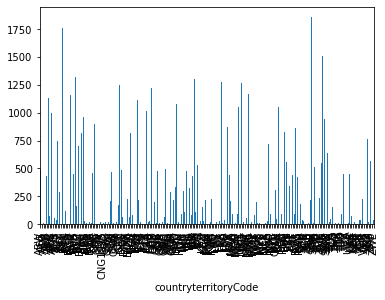

In [ ]:
df_rate = df_data.groupby(['countryterritoryCode'])['fatality_rate'].sum()
df_rate.plot.bar()

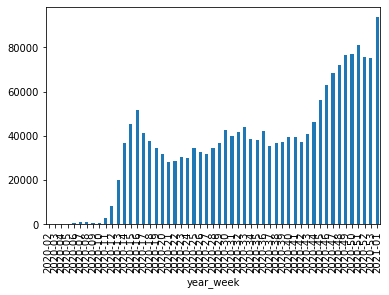

In [ ]:
df_time = df_data.groupby(['year_week'])['deaths_weekly'].sum()
df_time.plot.bar()

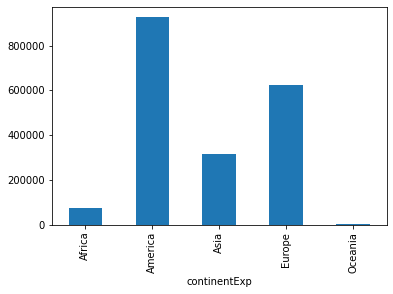

In [ ]:
df_rate_continent = df_data.groupby(['continentExp'])['deaths_weekly'].sum()
df_rate_continent.plot.bar()

**Data Scaling and Comparisons**

In [ ]:
scaler = MinMaxScaler()
df_data[['deaths_weekly_MinMaxScale']] = scaler.fit_transform(df_data[['deaths_weekly']])
df_data.head(n=6)

,dateRep,year_week,cases_weekly,deaths_weekly,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,notification_rate_per_100000_population_14-days,fatality_rate,deaths_weekly_MinMaxScale,deaths_weekly_StandardScale
0,11/01/2021,2021-01,675,71,Afghanistan,AF,AFG,38041757.0,Asia,4.15,1.866370,0.039870,-0.141524
1,04/01/2021,2020-53,902,60,Afghanistan,AF,AFG,38041757.0,Asia,7.61,1.577214,0.039407,-0.153233
2,28/12/2020,2020-52,1994,88,Afghanistan,AF,AFG,38041757.0,Asia,7.19,2.313248,0.040587,-0.123429
3,21/12/2020,2020-51,740,111,Afghanistan,AF,AFG,38041757.0,Asia,6.56,2.917846,0.041556,-0.098947
4,14/12/2020,2020-50,1757,71,Afghanistan,AF,AFG,38041757.0,Asia,9.01,1.866370,0.039870,-0.141524
5,07/12/2020,2020-49,1672,137,Afghanistan,AF,AFG,38041757.0,Asia,7.22,3.601306,0.042652,-0.071271


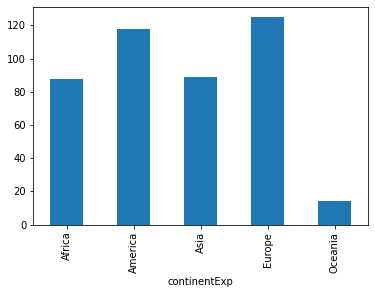

In [ ]:
df_rate_continent_mmscale= df_data.groupby(['continentExp'])['deaths_weekly_MinMaxScale'].sum()
df_rate_continent_mmscale.plot.bar()

In [ ]:
scaler = StandardScaler()
df_data[['deaths_weekly_StandardScale']] = scaler.fit_transform(df_data[['deaths_weekly']])
df_data.head(n=6)

,dateRep,year_week,cases_weekly,deaths_weekly,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,notification_rate_per_100000_population_14-days,fatality_rate,deaths_weekly_MinMaxScale,deaths_weekly_StandardScale
0,11/01/2021,2021-01,675,71,Afghanistan,AF,AFG,38041757.0,Asia,4.15,1.866370,0.039870,-0.141524
1,04/01/2021,2020-53,902,60,Afghanistan,AF,AFG,38041757.0,Asia,7.61,1.577214,0.039407,-0.153233
2,28/12/2020,2020-52,1994,88,Afghanistan,AF,AFG,38041757.0,Asia,7.19,2.313248,0.040587,-0.123429
3,21/12/2020,2020-51,740,111,Afghanistan,AF,AFG,38041757.0,Asia,6.56,2.917846,0.041556,-0.098947
4,14/12/2020,2020-50,1757,71,Afghanistan,AF,AFG,38041757.0,Asia,9.01,1.866370,0.039870,-0.141524
5,07/12/2020,2020-49,1672,137,Afghanistan,AF,AFG,38041757.0,Asia,7.22,3.601306,0.042652,-0.071271


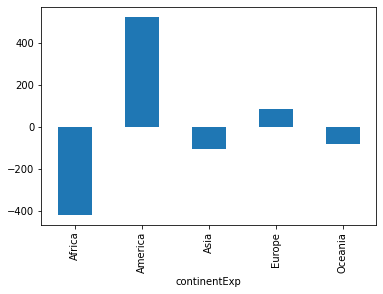

In [ ]:
df_rate_continent_sscale= df_data.groupby(['continentExp'])['deaths_weekly_StandardScale'].sum()
df_rate_continent_sscale.plot.bar()

**Insights from Analysis**

1. We have imported data csv.file from Google Drive and named it df_data. 

2. There are 9719 rows in this dataset, with 0-9 a total of 10 features. After removing the NAs, there are 9513 rows left. 

3. We've created a new feature called "fatality_rate" to measure the fatality rates per million population. Summing them up and plotting them versus country, we can have a general idea about the fatality rate per million population per country. However, there are too many countries on the x-asix and the graph seems rather messey. 

4. We then plot deaths_weekly per year_week to understand the impacts based on time. It seems like from year_week 2020-43 to 2021-01, the deaths_weekly keeps increasing. 

5. We've created a bar plot based on deaths_weekly per continentExp to understand the geographic impacts. From the graph, we can see that America holds the most deaths as of now, over 0.8 million, while Oceania holds the least deaths. However, due to scaling issue, we are not able to obtain the approximate death numbers for Oceania from the graph. 

6. We've used a min_max scaling feature to transform feature "deaths_weekly" into a new feature called "deaths_weekly_MinMaxScale". After ploting deaths_weekly_MinMaxScale versus continentExp, it seems like Europe now holds the highest deaths_weekly_MinMaxScale. This does not match our results from No.5. It seems like min_max scaling feature does not work very well for this example. 

6. We've then used a standard scaling feature to transform feature "deaths_weekly" into a new feature called "deaths_weekly_StandardScale". There are negative numbers for any values smaller than mean=0 after scalling, which does not seem to be applicable if we would like to use a groupby function to count the sum of deaths_weekly for each continent. 